# BATUHAN DEDEOĞLU

# 

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal as sig
%matplotlib  notebook

In [5]:
w_cont=np.linspace(0,2*np.pi,1000)
xgenlik=np.abs(2*np.cos(w_cont/2))             #genlik ve faz değerlerini hesaplanan işaret için yazdık
xfaz=np.array([-w/2 if w<np.pi else -w/2+np.pi for w in w_cont])

<IPython.core.display.Javascript object>


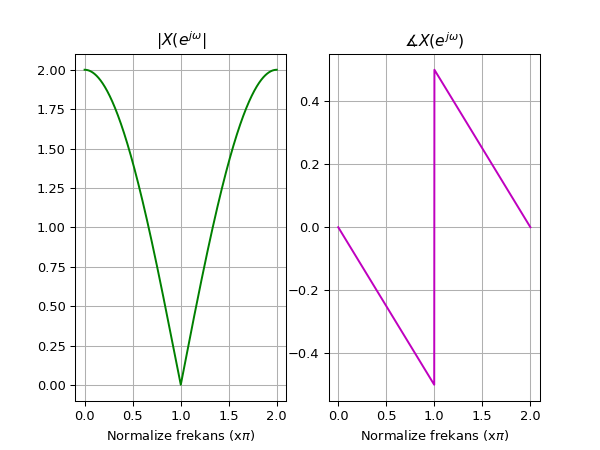

In [6]:
plt.subplot(121)
plt.plot(w_cont/np.pi, xgenlik,"g")
plt.title('$|X(e^{j\omega}|$')
plt.xlabel('Normalize frekans (x$\pi$)') 
plt.grid()
plt.subplot(122) 
plt.plot(w_cont/np.pi,xfaz/np.pi,"m") 
plt.title('$ \measuredangle X(e^{j\omega})$') 
plt.xlabel('Normalize frekans (x$\pi$)')
plt.grid()

## Discrete Fourier Transform(DFT)

In [7]:
def dirac(n):
    if n==0:
        return 1
    else:
        return 0          #birim dürtü fonksiyonumuzu tanımladık

In [8]:
N=8
w_discrete=np.arange(0,N)*(2*np.pi/N)
X_k=np.zeros([N],dtype=complex)

In [9]:
for k in range (N):
    for n in range (N):
        X_k[k]=X_k[k]+(dirac(n)+dirac(n-1))*np.exp(-1j*(2*np.pi/N)*k*n)        

In [10]:
Xgenlik=np.abs(X_k)
print(Xgenlik)
Xfaz=np.angle(X_k)
print(Xfaz)

[2.00000000e+00 1.84775907e+00 1.41421356e+00 7.65366865e-01
 1.22464680e-16 7.65366865e-01 1.41421356e+00 1.84775907e+00]
[ 0.         -0.39269908 -0.78539816 -1.17809725 -1.57079633  1.17809725
  0.78539816  0.39269908]


<IPython.core.display.Javascript object>


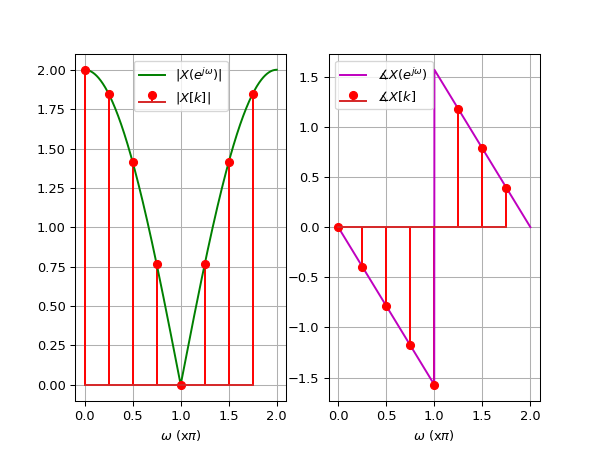

In [11]:
plt.figure()
plt.subplot(121)

plt.plot(w_cont/np.pi,xgenlik,"g",label='$|X(e^{j\omega})|$')
plt.stem(w_discrete/np.pi,Xgenlik,'r-',label='$|X[k]|$',markerfmt='ro',use_line_collection=True) 
plt.xlabel('$\omega$ (x$\pi$)') 
plt.grid()
plt.legend()
#N noktalı DFT hesapladığımızda aslında kompleks DTFT işaretini 2𝜋N aralıklarla toplamda N noktadan oluşacak şekilde örnekliyoruz.
plt.subplot(122)
plt.plot(w_cont/np.pi,xfaz,"m",label='$ \measuredangle X(e^{j\omega})$')
plt.stem(w_discrete/np.pi,Xfaz,'r-',label='$ \measuredangle X[k]$',markerfmt='ro',use_line_collection=True) 
plt.xlabel('$\omega$ (x$\pi$)') 
plt.grid()
plt.legend()

## Fast Fourier Transform (FFT)

In [12]:
from scipy.fftpack import fft , ifft

In [13]:
x=np.array([1,1])
fft_X=fft(x,8)    #N noktalı fft almak bize doğrudan DFT analiz denklemini kullanarak hesapladığımız noktaların aynısını ürettir
abs_fft_X=np.abs(fft_X)
print('abs_fft_X=',abs_fft_X,'\n')
phase_fft_X=np.angle(fft_X)
print('phase_fft_X=',phase_fft_X)

abs_fft_X= [2.         1.84775907 1.41421356 0.76536686 0.         0.76536686
 1.41421356 1.84775907] 

phase_fft_X= [-0.         -0.39269908 -0.78539816 -1.17809725 -0.          1.17809725
  0.78539816  0.39269908]


<IPython.core.display.Javascript object>


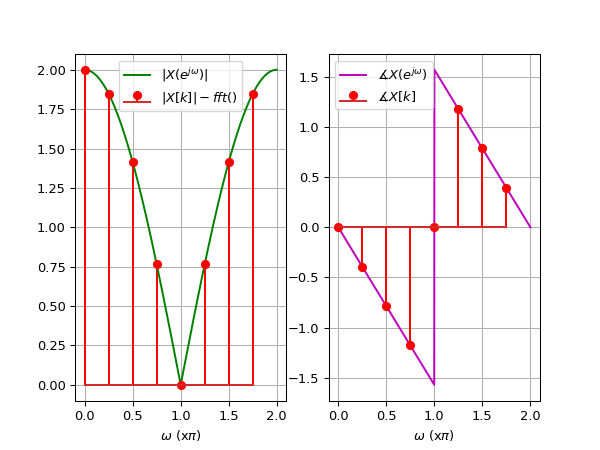

In [14]:
plt.figure()
plt.subplot(121)

plt.plot(w_cont/np.pi,xgenlik,"g",label='$|X(e^{j\omega})|$')
plt.stem(w_discrete/np.pi,abs_fft_X,'ro-',label='$|X[k]|-fft()$',markerfmt='ro',use_line_collection=True) 
plt.xlabel('$\omega$ (x$\pi$)') 
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(w_cont/np.pi,xfaz,"m",label='$ \measuredangle X(e^{j\omega})$')
plt.stem(w_discrete/np.pi,phase_fft_X,'ro-',label='$ \measuredangle X[k]$',markerfmt='ro',use_line_collection=True) 
plt.xlabel('$\omega$ (x$\pi$)') 
plt.grid()
plt.legend()

## Sampling in frequency → periodicity relation in time

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft , ifft

In [16]:
n1=np.arange(0,20)
x1=np.cos(3*np.pi/5*n1)
X1_abs=np.abs(fft(x1)) #fft(x) komutu ikinci bir parametre olmadığı için DFT hesaplarken nokta sayısını x ‘in boyuna eşit seçer
w_disc_1=n1*2*np.pi/len(n1)

In [17]:
n2=np.arange(0,25)
x2=np.cos(3*np.pi/5*n2)
X2_abs=np.abs(fft(x2)) 
w_disc_2=n2*2*np.pi/len(n2)

<IPython.core.display.Javascript object>


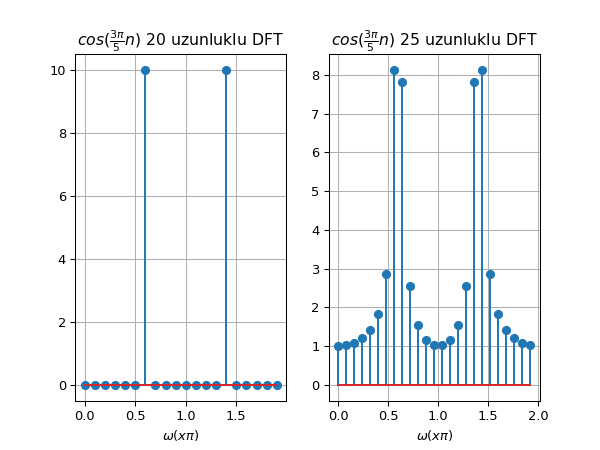

In [18]:

plt.figure()
plt.subplot(121) 
plt.stem(w_disc_1/np.pi,X1_abs,use_line_collection=True) 
plt.xlabel('$\omega (x\pi)$') 
plt.title('$cos(\\frac{3\\pi}{5}n)$ 20 uzunluklu DFT')
plt.grid()

plt.subplot(122) 
plt.stem(w_disc_2/np.pi,X2_abs,use_line_collection=True) 
plt.xlabel('$\omega (x\pi)$') 
plt.title('$cos(\\frac{3\\pi}{5}n)$ 25 uzunluklu DFT')
plt.grid()

In [19]:
#işaretinin periyodu 10 örnek olduğu için indis vektörünü 10’un bir tam katı olacak şekilde ayarladığınız sürece
#DFT genlik grafiğinde 2 tane dürtü görürüz.

## Signal synthesis from DFT amplitude and phase graphs

In [20]:
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.fftpack import fft , ifft

In [21]:
x=np.array([0,2,0,-2])
N=len(x)
n=np.arange(0,4)
w_disc=n*2*np.pi/N
X_abs=np.abs(fft(x)/N) 
X_phase=np.angle(fft(x)/N)

<IPython.core.display.Javascript object>


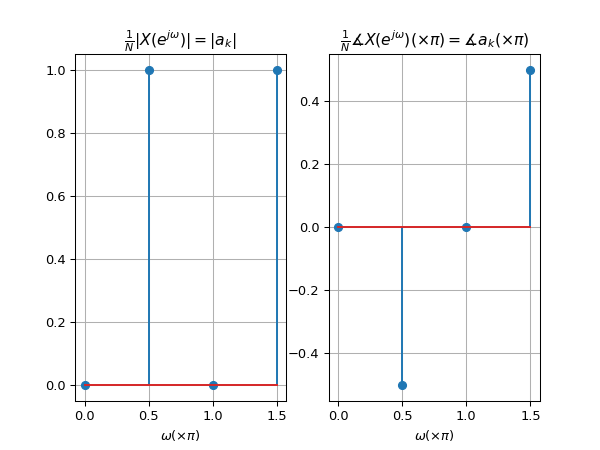

In [22]:
plt.figure()
plt.subplot(121) 
plt.stem(w_disc/np.pi,X_abs,use_line_collection=True) 
plt.xlabel('$\omega (\\times \pi)$') 
plt.title('$\\frac{1}{N}|X(e^{j\omega})|=|a_{k}|$') 
plt.grid()

plt.subplot(122)
plt.stem(w_disc/np.pi,X_phase/np.pi,use_line_collection=True) 
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}\measuredangle X(e^{j\omega})(\\times \pi)=\measuredangle a_k(\\times \pi)$')
plt.grid()

## Building unit step function and Impulse function

In [23]:
n = np.arange(-20,21)

In [24]:
u_n = np.array([0 if i < 0 else 1 for i in n])

<IPython.core.display.Javascript object>


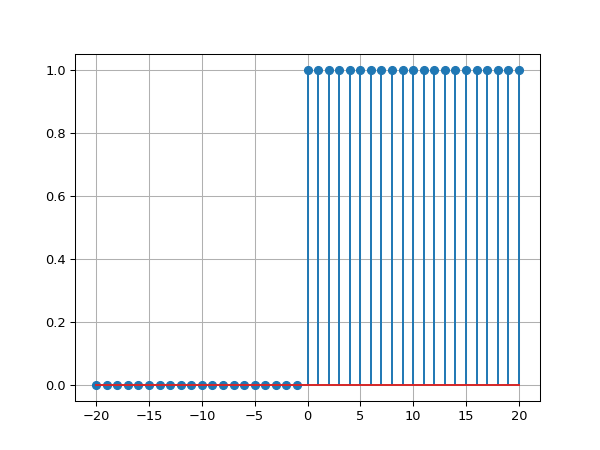

In [25]:
u_n = [] 
for i in n: 
    if i<0: 
        u_n.append(0) 
    else: 
        u_n.append(1) 
plt.figure()
plt.stem(n,u_n,use_line_collection=True)
plt.grid()
plt.show()

In [26]:
u_n = np.concatenate((np.zeros(20),np.ones(21)))

In [27]:
u_n=np.ones(len(n))
u_n[n<0]=0

<IPython.core.display.Javascript object>


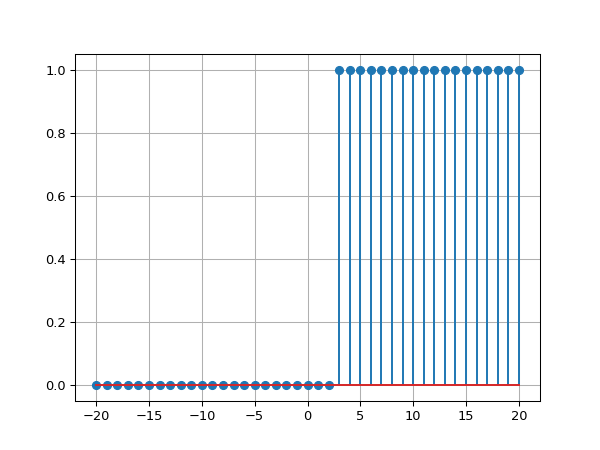

In [28]:
n= np.arange(-20,21)
u_n_3 = np.array([0 if i<3 else 1 for i in n])
plt.figure()
plt.stem(n,u_n_3,use_line_collection=True)
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


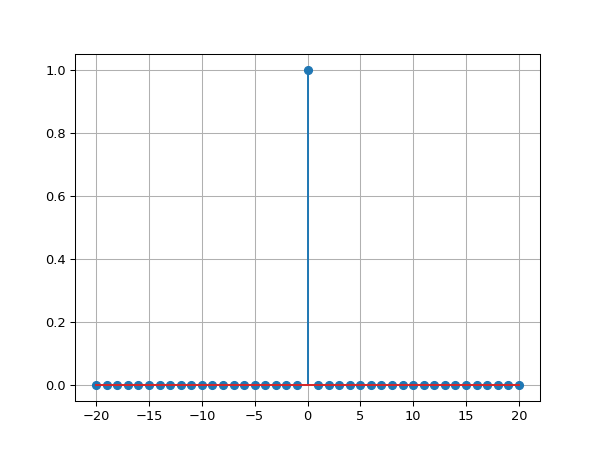

In [29]:
n= np.arange(-20,21) 
dirac_n = np.array([0 if i!=0 else 1 for i in n])
plt.figure()
plt.stem(n,dirac_n,use_line_collection=True)
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


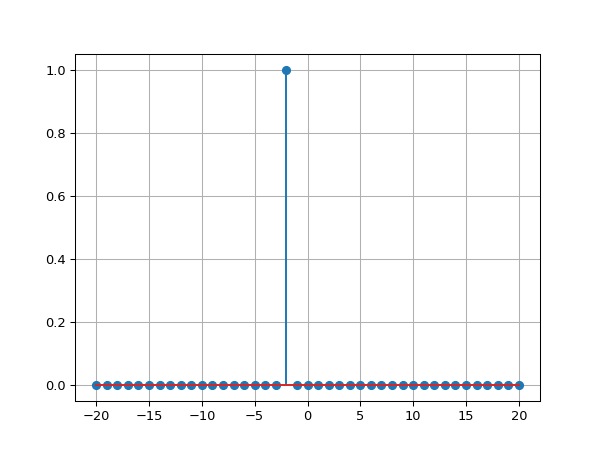

In [30]:
n= np.arange(-20,21) 
dirac_n_arti_2 = np.array([0 if i!=-2 else 1 for i in n])
plt.figure()
plt.stem(n,dirac_n_arti_2,use_line_collection=True)
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


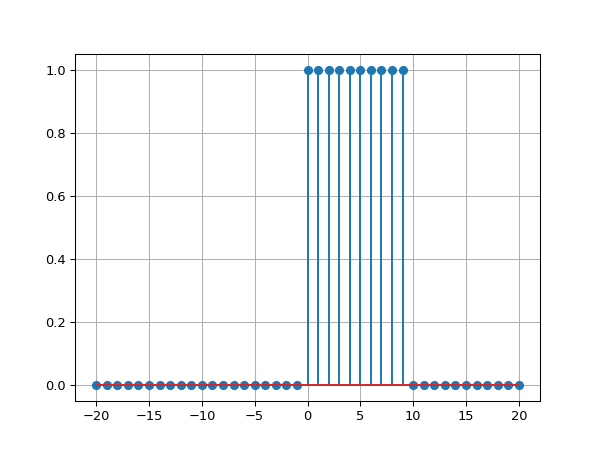

In [31]:
n= np.arange(-20,21) 
un_eksi_un_10 =np.array([1 if i>=0 and i<10 else 0 for i in n])
plt.figure()
plt.stem(n,un_eksi_un_10,use_line_collection=True)
plt.grid()
plt.show()

## EXAMPLES:
## 1) 
### A-ŞIKKI)

In [39]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import fft , ifft
%matplotlib notebook

In [40]:
w_cont=np.linspace(0,2*np.pi,1000)

In [41]:
H_abs=np.abs(2*np.sin(w_cont/2))
H_phase=np.angle(np.exp(1j*(np.pi/2-w_cont/2)))

<IPython.core.display.Javascript object>


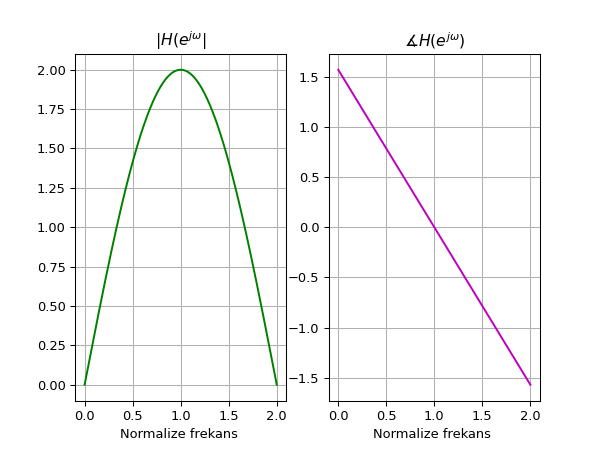

In [42]:
plt.figure()
plt.subplot(121)
plt.plot(w_cont/np.pi,H_abs,"g")           #genliğimizi çizdirdik
plt.title('$|H(e^{j\omega}|$')
plt.xlabel('Normalize frekans ')
plt.grid()

plt.subplot(122) 
plt.plot(w_cont/np.pi,H_phase,"m")              #fazımızı çizdirdik
plt.title('$ \measuredangle H(e^{j\omega})$') 
plt.xlabel('Normalize frekans ')
plt.grid()

plt.show()     

### B-şıkkı)


### C- şıkkı)

In [36]:
h=np.array([1,-1])
N=16
w_discrete=np.arange(0,N)*(2*np.pi/N)

fft_H=fft(h,N)
abs_fft_H=np.abs(fft_H)
phase_fft_H=np.angle(fft_H)

print(abs_fft_H)
print(phase_fft_H)

[0.         0.39018064 0.76536686 1.11114047 1.41421356 1.66293922
 1.84775907 1.96157056 2.         1.96157056 1.84775907 1.66293922
 1.41421356 1.11114047 0.76536686 0.39018064]
[-0.          1.37444679  1.17809725  0.9817477   0.78539816  0.58904862
  0.39269908  0.19634954 -0.         -0.19634954 -0.39269908 -0.58904862
 -0.78539816 -0.9817477  -1.17809725 -1.37444679]


<IPython.core.display.Javascript object>


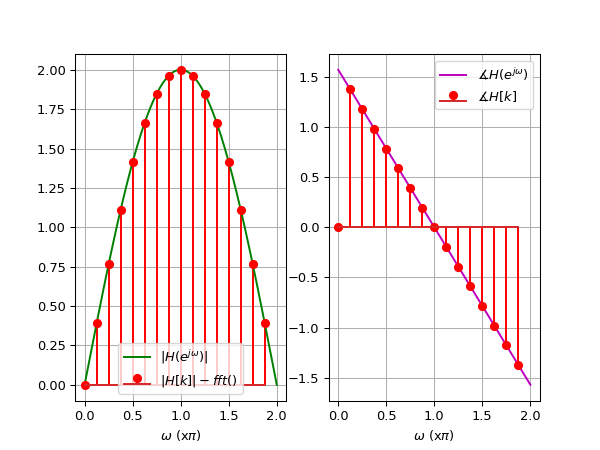

In [37]:
plt.figure()
plt.subplot(121)

plt.plot(w_cont/np.pi,H_abs,"g",label='$|H(e^{j\omega})|$')
plt.stem(w_discrete/np.pi,abs_fft_H,'ro-',label='$|H[k]|-fft()$',markerfmt='ro',use_line_collection=True) 
plt.xlabel('$\omega$ (x$\pi$)') 
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(w_cont/np.pi,H_phase,"m",label='$ \measuredangle H(e^{j\omega})$')
plt.stem(w_discrete/np.pi,phase_fft_H,'ro-',label='$ \measuredangle H[k]$',markerfmt='ro',use_line_collection=True) 
plt.xlabel('$\omega$ (x$\pi$)') 
plt.grid()
plt.legend()

## 2)

<IPython.core.display.Javascript object>


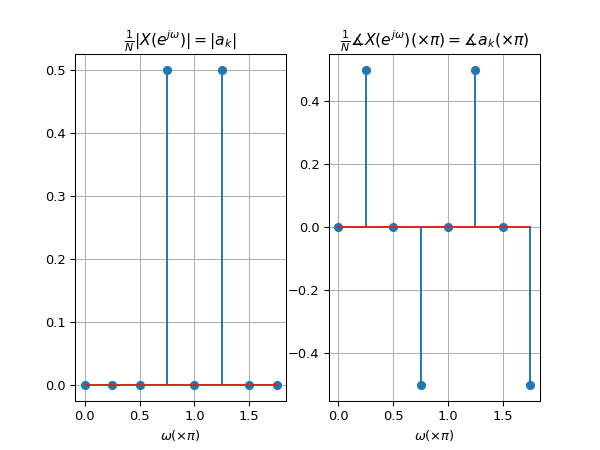

In [38]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy.fftpack import fft , ifft

x=np.array([0,0.707106,-1,0.707106,0,-0.707106,1,-0.707106]) 
N=len(x) 
n=np.arange(0,8) 
w_disc=n*2*np.pi/N 

X_abs=np.abs(fft(x)/N) 
X_phase=np.angle(fft(x)/N)

plt.figure()
plt.subplot(121) 
plt.stem(w_disc/np.pi,X_abs,use_line_collection=True) 
plt.xlabel('$\omega (\\times \pi)$') 
plt.title('$\\frac{1}{N}|X(e^{j\omega})|=|a_{k}|$') 
plt.grid()

plt.subplot(122) 
plt.stem(w_disc/np.pi,X_phase/np.pi,use_line_collection=True) 
plt.xlabel('$\omega (\\times \pi)$') 
plt.title('$\\frac{1}{N}\measuredangle X(e^{j\omega})(\\times \pi)=\measuredangle a_k(\\times \pi)$')
plt.grid()
